In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [3]:
from glob import glob


In [4]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



# FITTING PROCEDURES

In [5]:
# Generate target time to check on L dependnece 
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]


In [6]:
narr_clim_test_3d = xr.open_dataset('narr_clim_test_3d_aug2020.nc')
persiann_clim_test_3d = xr.open_dataset('persiann_clim_test_3d_aug2020.nc')
cpc_clim_test_3d = xr.open_dataset('cpc_clim_test_3d_aug2020.nc')
ds_clim_test_3d = xr.open_dataset('ds_clim_test_3d_all_aug2020.nc')

In [7]:
import cmocean
cmap = cmocean.cm.deep


In [8]:
smooth_clim_cauchy = xr.open_dataset('smooth_clim_cauchy_oct2020.nc')

In [9]:
smooth_clim_cauchy

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, lat, lon) float64 ...

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.image import imread
import cartopy.io.shapereader as shpreader
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)



In [11]:
cpc_clim_test_3d

<xarray.Dataset>
Dimensions:      (lat: 28, lon: 71, quant: 5, target_clim: 365, window: 3)
Coordinates:
  * quant        (quant) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * window       (window) int64 7 15 31
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    apcp         (target_clim, window, quant, lat, lon) float64 ...

Text(0.5, 1.0, 'PERSIANN')

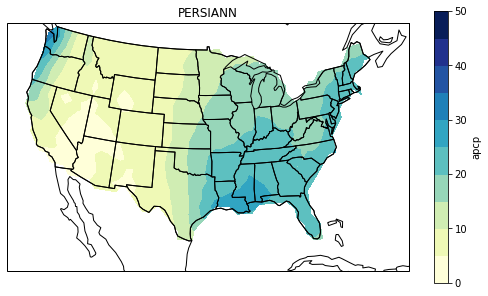

In [12]:
ttp = persiann_clim_test_3d.sel(window=31).sel(quant=0.85).mean('target_clim').apcp.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(9,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('PERSIANN')

/local/ERAin/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'CPC')

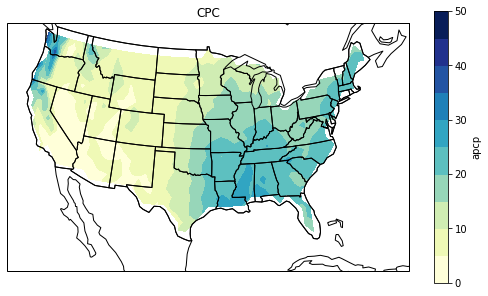

In [13]:
ttp = cpc_clim_test_3d.sel(window=31).sel(quant=0.85).mean('target_clim').apcp.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(9,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('CPC')

Text(0.5, 1.0, 'NARR')

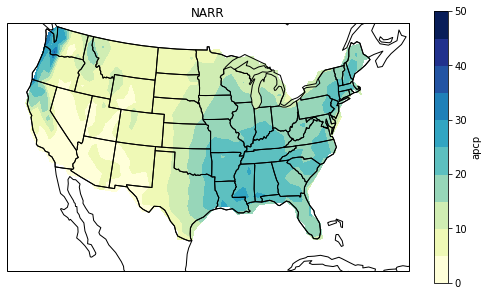

In [14]:
ttp = narr_clim_test_3d.sel(window=31).sel(quant=0.85).mean('target_clim').apcp.where(ds_mask.the_geom>0.1)
ttp1 = smooth_clim_cauchy.sel(Lbeg='14-33').mean('target_clim').pr_sfc.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(9,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('NARR')


In [15]:
smooth_clim_cauchy = smooth_clim_cauchy.rename({'Lbeg':'L_range'})

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


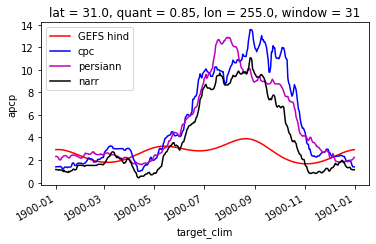

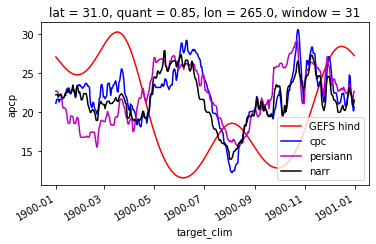

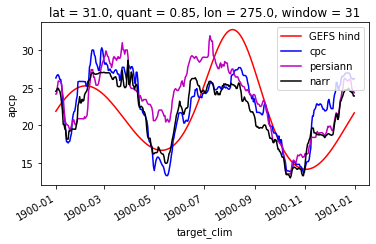

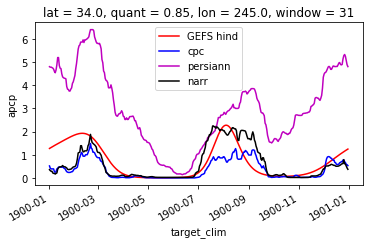

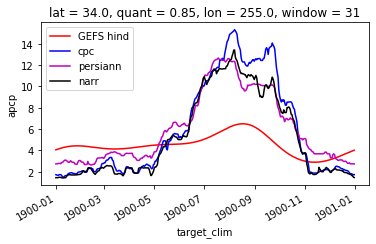

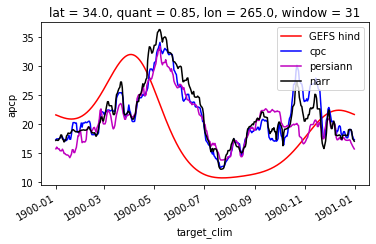

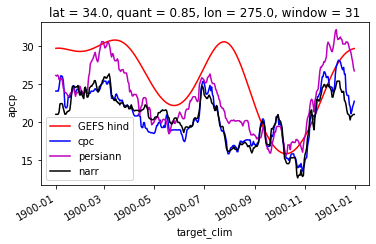

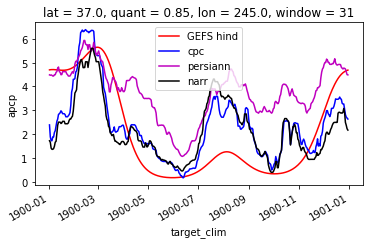

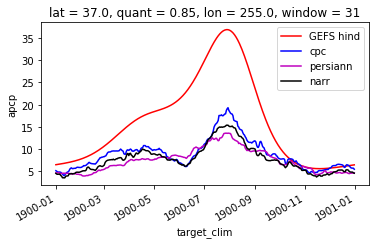

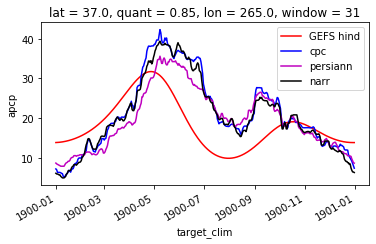

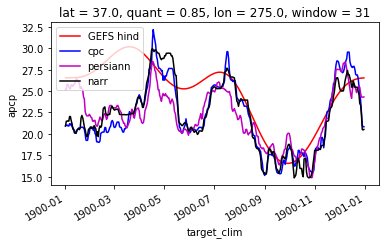

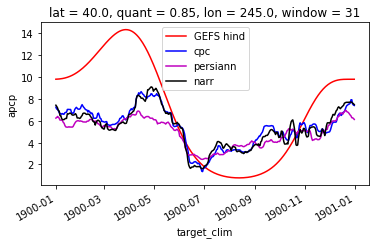

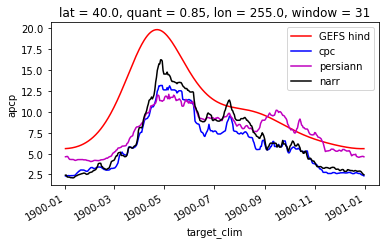

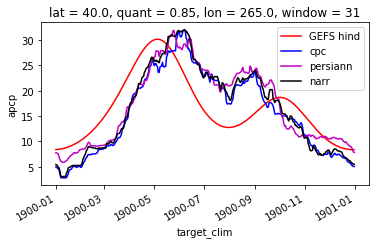

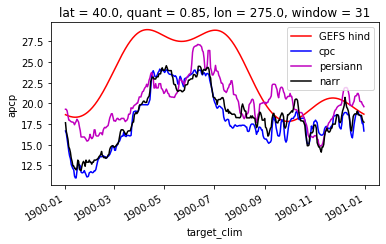

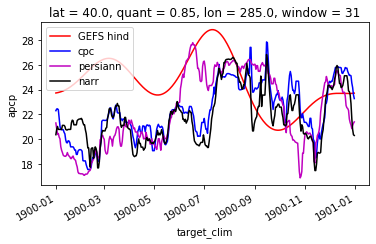

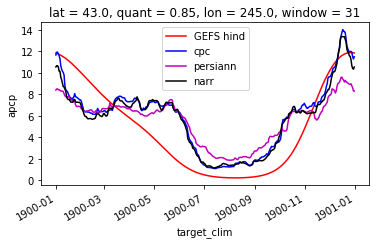

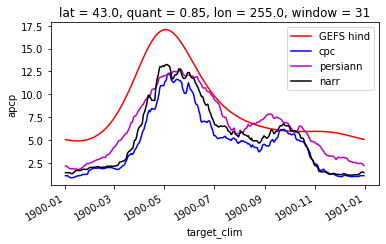

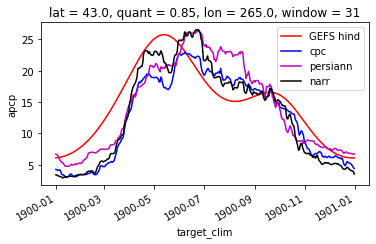

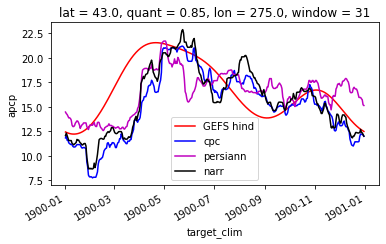

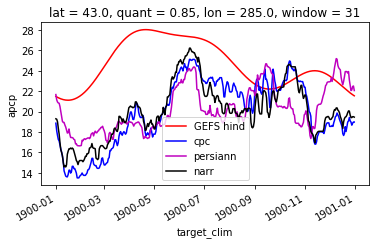

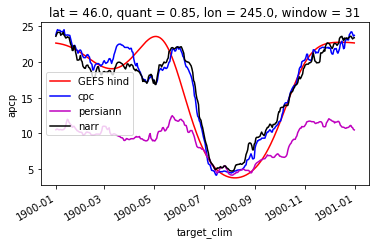

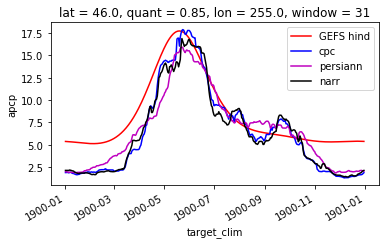

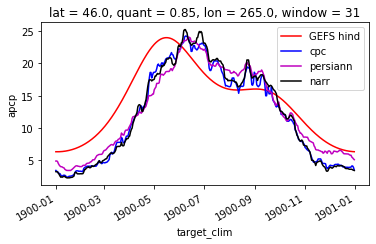

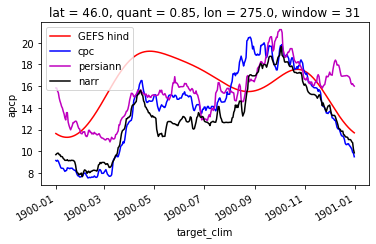

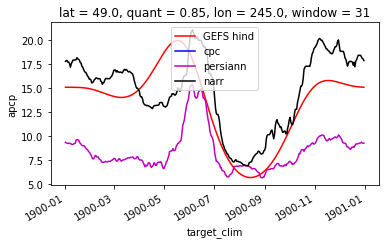

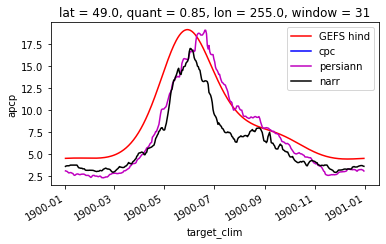

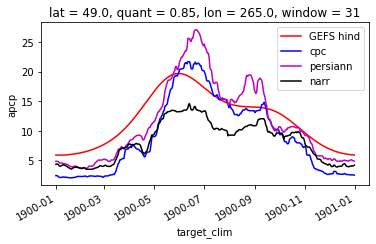

In [128]:
for ilat in np.arange(25,51,3):
    for ilon in np.arange(235,301,10):
        if np.sum(np.isnan(narr_clim_test_3d.where(ds_mask.the_geom>0).apcp[:,:,-1,:,:].sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(20,3))
            ax = plt.subplot(131)
            smooth_clim_cauchy.pr_sfc.sel(L_range='14-33').sel(lat=ilat, lon=ilon).plot.line('r-',x='target_clim', label='GEFS hind')
            cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim', label='cpc')
            persiann_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('m',ax=ax, x='target_clim', label = 'persiann')
            narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('k',ax=ax, x='target_clim', label='narr')
            ax.legend()


In [91]:
def correlate_target_clim(dsin):
    if np.sum(np.isnan(dsin.pr_sfc))==0:
        out = np.corrcoef(dsin.pr_sfc.values.ravel(),dsin.apcp.values.ravel())
#         out = np.corrcoef(dsin.pr_sfc,dsin.apcp)
        out=out[0][1]
        
    else:
        out=np.nan
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(out)


In [21]:
narr_clim_test_3d

<xarray.Dataset>
Dimensions:      (lat: 28, lon: 71, quant: 5, target_clim: 365, window: 3)
Coordinates:
  * quant        (quant) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * window       (window) int64 7 15 31
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    apcp         (target_clim, window, quant, lat, lon) float64 ...

In [96]:
corr_narr =[]
for il in np.arange(0,1):
    corr_narri = []
    for iw in np.arange(0,3):
        stack_f = ds_clim_test_3d_all.isel(L_range=il).sel(quantile=0.85).stack(allpoints=['lat','lon'])  
        stack_o = narr_clim_test_3d.isel(window=iw).isel(quant=4).stack(allpoints=['lat','lon']) 
        ds_stack = xr.merge((stack_f.drop(('quantile')),stack_o))
#         pause
        corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
        corr_clim_map = corr_clim.unstack('allpoints')
        corr_clim_map = corr_clim_map.expand_dims('L_range')
        corr_clim_map = corr_clim_map.expand_dims('quant')
        corr_clim_map = corr_clim_map.expand_dims('window')
        corr_narri.append(corr_clim_map)
    corr_narri = xr.concat(corr_narri,dim='window')
    corr_narr.append(corr_narri)
corr_narr_fo = xr.concat(corr_narr, dim='L_range')


In [98]:
corr_narr =[]
for il in np.arange(0,6):
    corr_narri = []
    for iw in np.arange(0,3):
        stack_f = smooth_clim_cauchy.isel(L_range=il).stack(allpoints=['lat','lon']) 
        stack_o = narr_clim_test_3d.isel(window=iw).isel(quant=4).stack(allpoints=['lat','lon']) 
        ds_stack = xr.merge((stack_f, stack_o))
        corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
        corr_clim_map = corr_clim.unstack('allpoints')
        corr_clim_map = corr_clim_map.expand_dims('L_range')
        corr_clim_map = corr_clim_map.expand_dims('quant')
        corr_clim_map = corr_clim_map.expand_dims('window')
        corr_narri.append(corr_clim_map)
    corr_narri = xr.concat(corr_narri,dim='window')
    corr_narr.append(corr_narri)
corr_narr = xr.concat(corr_narr, dim='L_range')


In [103]:
stack_f

<xarray.Dataset>
Dimensions:      (allpoints: 1988, target_clim: 365)
Coordinates:
    quant        float64 0.667
    window       int64 31
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
  * allpoints    (allpoints) MultiIndex
  - lat          (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon          (allpoints) float64 230.0 231.0 232.0 ... 298.0 299.0 300.0
Data variables:
    apcp         (target_clim, allpoints) float64 24.01 30.23 ... 1.491 1.329

In [120]:
stack_f = narr_clim_test_3d.isel(window=2).isel(quant=2)#.stack(allpoints=['lat','lon'])   
stack_o = narr_clim_test_3d.isel(window=2).isel(quant=4)#.stack(allpoints=['lat','lon']) 
ds_stack = xr.merge((stack_f.drop(('quant','window')).rename({'apcp':'pr_sfc'}), 
                     stack_o.drop(('quant','window'))))
ds_stack = ds_stack.stack(allpoints=['lat','lon'])   
corr_temp = ds_stack.groupby('allpoints').apply(correlate_target_clim)
corr_narr_05_075 = corr_clim.unstack('allpoints').rename({'allpoints_level_0':'lat', 
                                                          'allpoints_level_1':'lon'})


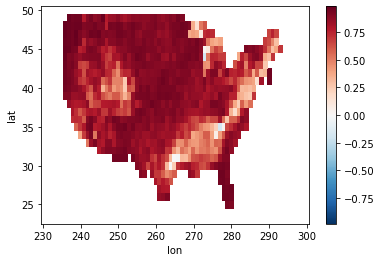

In [122]:
corr_narr_05_075.where(ds_mask.the_geom>0.1).plot()

In [124]:
smooth_clim_cauchy_moreQ

<xarray.Dataset>
Dimensions:      (L_range: 1, lat: 28, lon: 71, quantile: 3, target_clim: 365)
Coordinates:
  * L_range      (L_range) object '14-33'
  * quantile     (quantile) float64 0.5 0.667 0.75
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, L_range, quantile, lat, lon) float64 ...

In [126]:
stack_f = smooth_clim_cauchy.isel(L_range=0)#.stack(allpoints=['lat','lon'])   
stack_o = smooth_clim_cauchy_moreQ.isel(L_range=0).isel(quantile=0)#.stack(allpoints=['lat','lon']) 
ds_stack = xr.merge((stack_f.drop(('L_range')), 
                     stack_o.drop(('L_range', 'quantile')).rename({'pr_sfc':'apcp'})))
ds_stack = ds_stack.stack(allpoints=['lat','lon'])   
corr_temp = ds_stack.groupby('allpoints').apply(correlate_target_clim)
corr_smooth_05_075 = corr_clim.unstack('allpoints').rename({'allpoints_level_0':'lat', 
                                                          'allpoints_level_1':'lon'})


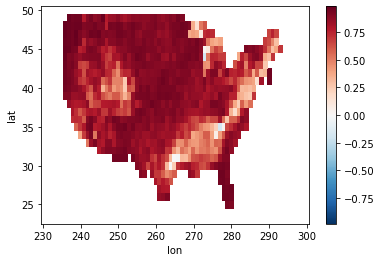

In [127]:
corr_smooth_05_075.where(ds_mask.the_geom>0.1).plot()

In [ ]:
corr_cpc =[]
for il in np.arange(0,6):
    corr_cpci = []
    for iw in np.arange(0,3):
        stack_f = smooth_clim_cauchy.isel(L_range=il).stack(allpoints=['lat','lon'])  
        stack_o = cpc_clim_test_3d.isel(window=iw).isel(quant=4).stack(allpoints=['lat','lon']) 
        ds_stack = xr.merge((stack_f, stack_o))
        corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
        corr_clim_map = corr_clim.unstack('allpoints')
        corr_clim_map = corr_clim_map.expand_dims('L_range')
        corr_clim_map = corr_clim_map.expand_dims('quant')
        corr_clim_map = corr_clim_map.expand_dims('window')
        corr_cpci.append(corr_clim_map)
    corr_cpci = xr.concat(corr_cpci,dim='window')
    corr_cpc.append(corr_cpci)
corr_cpc = xr.concat(corr_cpc, dim='L_range')


In [26]:
corr_persiann =[]
for il in np.arange(0,6):
    corr_persianni = []
    for iw in np.arange(0,3):
        stack_f = smooth_clim_cauchy.isel(L_range=il).stack(allpoints=['lat','lon'])  
        stack_o = persiann_clim_test_3d.isel(window=iw).isel(quant=4).stack(allpoints=['lat','lon']) 
        ds_stack = xr.merge((stack_f, stack_o))
        corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
        corr_clim_map = corr_clim.unstack('allpoints')
        corr_clim_map = corr_clim_map.expand_dims('L_range')
        corr_clim_map = corr_clim_map.expand_dims('quant')
        corr_clim_map = corr_clim_map.expand_dims('window')
        corr_persianni.append(corr_clim_map)
    corr_persianni = xr.concat(corr_persianni,dim='window')
    corr_persiann.append(corr_persianni)
corr_persiann = xr.concat(corr_persiann, dim='L_range')



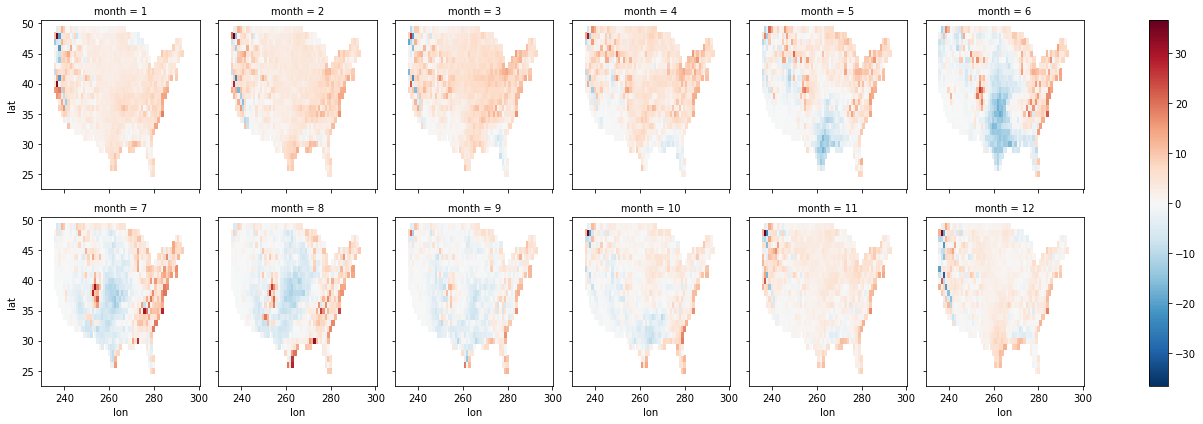

In [214]:
Ads = smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.month').mean()
Bds = narr_clim_test_3d.apcp.isel(quant=4).isel(window=2).groupby('target_clim.month').mean()

(Ads-Bds).plot(col='month',col_wrap=6, cmap='RdBu_r')

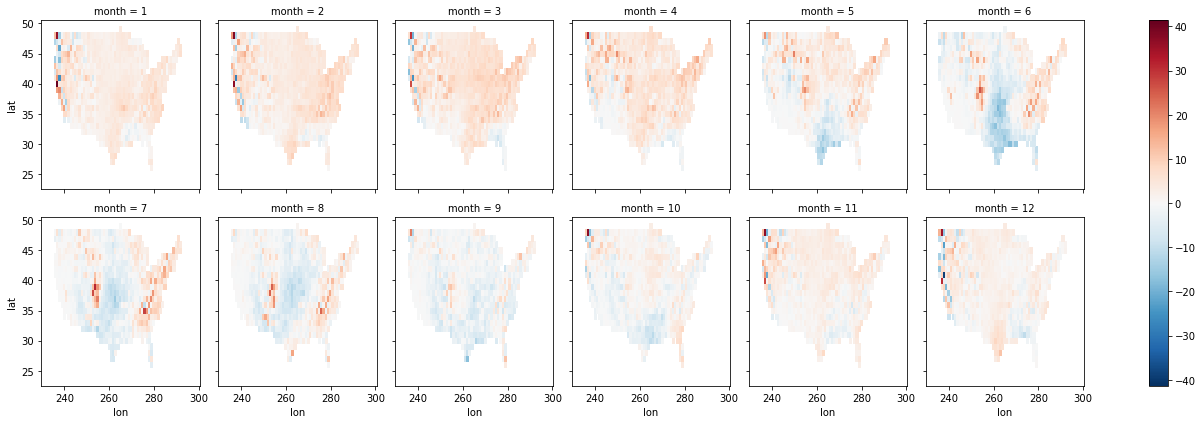

In [215]:
Ads = smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.month').mean()
Bds = cpc_clim_test_3d.apcp.isel(quant=4).isel(window=2).groupby('target_clim.month').mean()

(Ads-Bds).plot(col='month',col_wrap=6, cmap='RdBu_r')

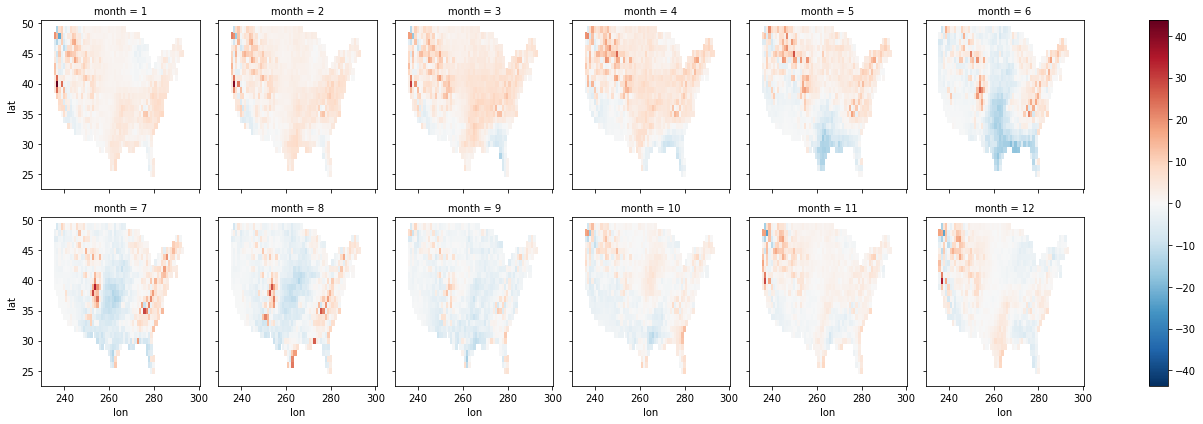

In [216]:
Ads = smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.month').mean()
Bds = persiann_clim_test_3d.apcp.isel(quant=4).isel(window=2).groupby('target_clim.month').mean()

(Ads-Bds).plot(col='month',col_wrap=6, cmap='RdBu_r')

In [40]:
corr_narr.coords

Coordinates:
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * window   (window) int64 7 15 31
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * quant    (quant) float64 0.85
  * L_range  (L_range) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'

Text(0.5, 1.0, 'NARR')

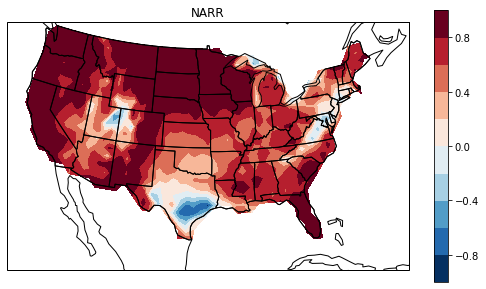

In [38]:
plt.figure(figsize=(9,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
corr_narr.isel(L_range=0).isel(window=2).isel(quant=0).where(ds_mask.the_geom>0).plot.contourf(
                levels=np.arange(-1, 1.1, 0.2), cmap = 'RdBu_r', 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          )
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('NARR')


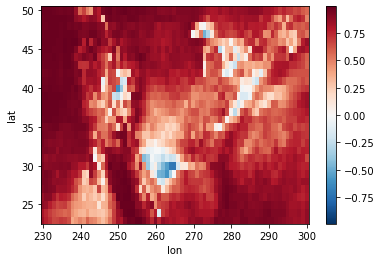

In [93]:
corr_narr_fo.isel(L_range=0).isel(window=2).isel(quant=0).rename({'allpoints_level_0':'lat','allpoints_level_1':'lon'}).plot()

Text(0.5, 1.0, 'NARR')

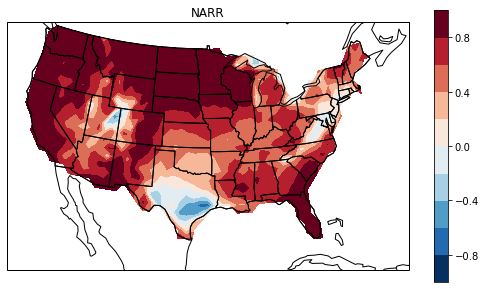

In [94]:
plt.figure(figsize=(9,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
corr_narr_fo.isel(L_range=0).isel(window=2).isel(quant=0).rename({'allpoints_level_0':'lat','allpoints_level_1':'lon'}).where(ds_mask.the_geom>0).plot.contourf(
                levels=np.arange(-1, 1.1, 0.2), cmap = 'RdBu_r', 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          )
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('NARR')


/local/ERAin/lib/python3.6/site-packages/xarray/plot/facetgrid.py:365: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


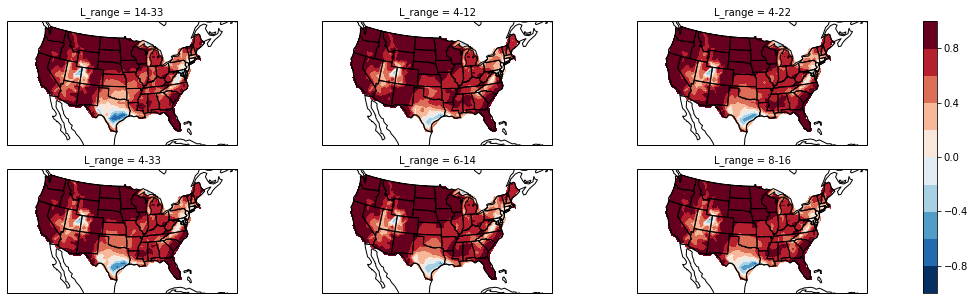

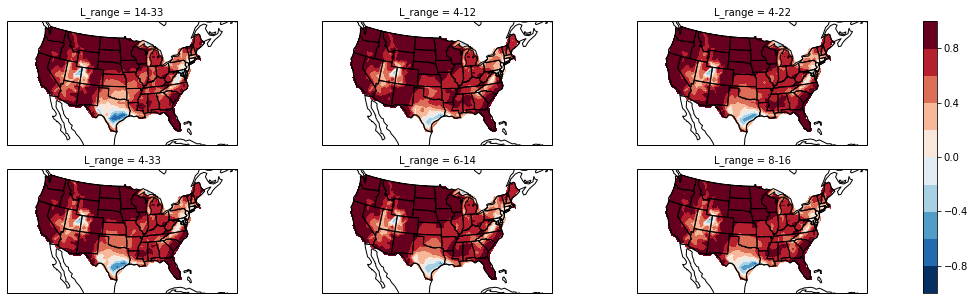

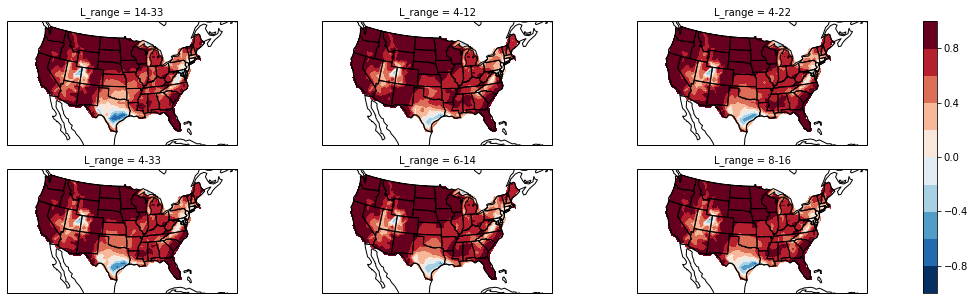

In [36]:
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

for il in np.arange(0,3):
#     plt.figure(figsize=(10,5))
    g = corr_narr.isel(window=2).isel(quant=0).where(ds_mask.the_geom>0).plot.contourf( 
        col='L_range', col_wrap=3, figsize=(20,5),
        zorder=-1, levels=np.arange(-1, 1.1, 0.2), cmap = 'RdBu_r',
        origin='upper', transform = proj_dta, subplot_kws={'projection':proj_map}, 
#         add_colorbar=False
    )
    # ax.stock_img()
#     plt.subplots_adjust(wspace=0.01,hspace=0.2)

    for ii, ax in enumerate(g.axes.flat):
        ax.coastlines()
        ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
        ax.add_feature(cfeature.BORDERS)
        ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        facecolor='none', edgecolor='k')

In [184]:
corr_narr2 = xr.combine_nested(corr_narr, concat_dim=['Lbeg'])

In [286]:
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/NE1_50M_SR_W.zip

--2020-08-24 16:37:49--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/NE1_50M_SR_W.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 66.147.242.194
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|66.147.242.194|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://naciscdn.org/naturalearth/50m/raster/NE1_50M_SR_W.zip [following]
--2020-08-24 16:37:50--  http://naciscdn.org/naturalearth/50m/raster/NE1_50M_SR_W.zip
Resolving naciscdn.org (naciscdn.org)... 146.201.97.163
Connecting to naciscdn.org (naciscdn.org)|146.201.97.163|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://naciscdn.org/naturalearth/50m/raster/NE1_50M_SR_W.zip [following]
--2020-08-24 16:37:51--  https://naciscdn.org/naturalearth/50m/raster/NE1_50M_SR_W.zip
Connecting to naciscdn.org (naciscdn.org)|146.201.97.163|:443... connected.
HTTP request sent, awai

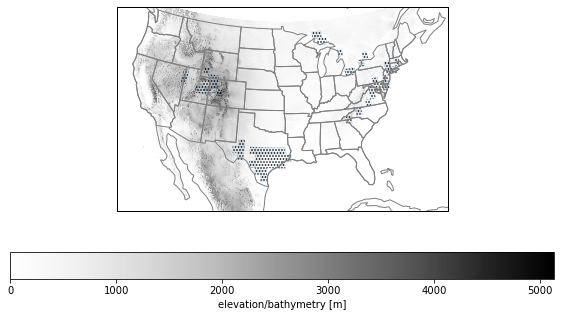

In [43]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
# plt.figure(figsize=(10,5))
# ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )

# corr_narr.isel(quant=0).isel(window=2).isel(Lbeg=3).plot(vmax=1, zorder=-1, transform=ccrs.PlateCarree(),
#                     cbar_kwargs=dict(orientation='horizontal', fraction=0.1))
# ax.coastlines()
# ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
# ax.add_feature(cfeature.BORDERS)
# ax.add_geometries(
# shpreader.Reader(states_shp).geometries(),
# ccrs.PlateCarree(),
# facecolor='none', edgecolor='k')
# #         ax.stock_img(name='ne_shaded')

plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )

bath = xr.open_dataset('https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO2v2/.z/X/-125/-55/RANGEEDGES/Y/15/50/RANGEEDGES/0/masklt/dods')
bath.z.plot(ax=ax, cmap='Greys', transform=ccrs.PlateCarree(),
                    cbar_kwargs=dict(orientation='horizontal', fraction=0.1))
shaded = corr_narr.isel(quant=0).isel(window=2).isel(L_range=0)
ax.pcolor(shaded.lon.values-0.5, shaded.lat.values-0.5, shaded.where(shaded<=0).values, alpha=0.1,
          cmap='Blues',
               hatch='....',
             transform=ccrs.PlateCarree())

ax.set_extent([-120, -70, 20, 50], ccrs.Geodetic())

ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.coastlines(color='gray');

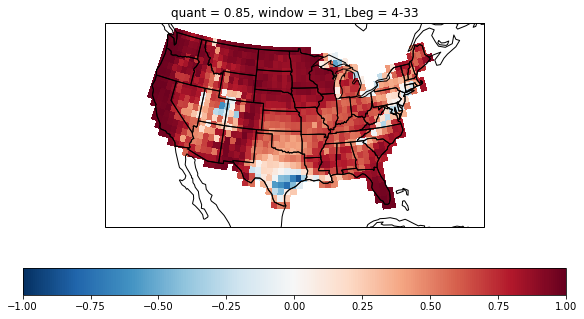

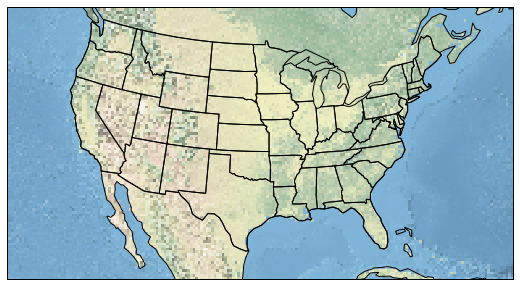

In [295]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.image import imread




plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ax.imshow(imread('NE1_50M_SR_W/NE1_50M_SR_W.tif'), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
#        

In [299]:
# import matplotlib.pyplot as plt
# from matplotlib.transforms import offset_copy

# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt


# def main():
#     # Create a Stamen terrain background instance.
#     stamen_terrain = cimgt.Stamen('terrain-background')

#     fig = plt.figure()

#     # Create a GeoAxes in the tile's projection.
#     ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

#     # Limit the extent of the map to a small longitude/latitude range.
#     ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.Geodetic())

#     # Add the Stamen data at zoom level 8.
#     ax.add_image(stamen_terrain, 8)

#     # Add a marker for the Eyjafjallajökull volcano.

#     # Use the cartopy interface to create a matplotlib transform object
#     # for the Geodetic coordinate system. We will use this along with
#     # matplotlib's offset_copy function to define a coordinate system which
#     # translates the text by 25 pixels to the left.
#     geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    
#     ax.coastlines()
#     ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_geometries(
#     shpreader.Reader(states_shp).geometries(),
#     ccrs.PlateCarree(),
#     facecolor='none', edgecolor='k')
    
#     plt.show()


# if __name__ == '__main__':
#     main()

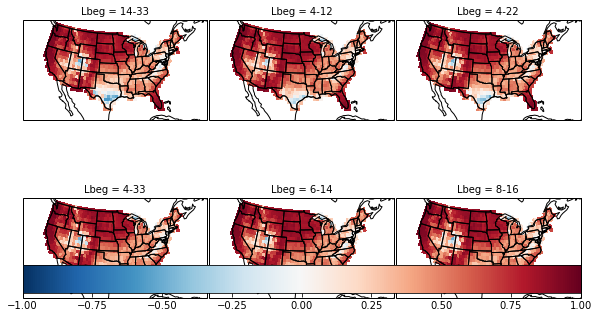

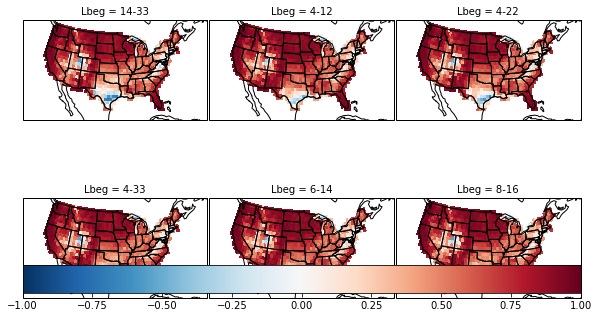

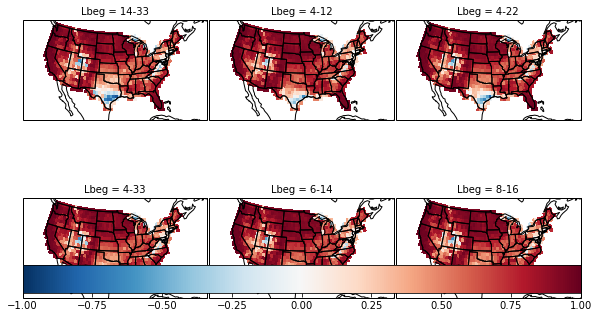

In [277]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
for iw in np.arange(0,3):
    g = corr_narr.isel(quant=0).isel(window=iw).plot(col='Lbeg', col_wrap=3, vmax=1, zorder=-1, transform=ccrs.PlateCarree(),
                    subplot_kws=dict(projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45)),
                    cbar_kwargs=dict(orientation='horizontal', fraction=0.1))
    plt.subplots_adjust(wspace=0.01,hspace=0.2)
    for i, ax in enumerate(g.axes.flat):
        ax.coastlines()
        ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
        ax.add_feature(cfeature.BORDERS)
        ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        facecolor='none', edgecolor='k')
#         ax.stock_img(name='ne_shaded')

        

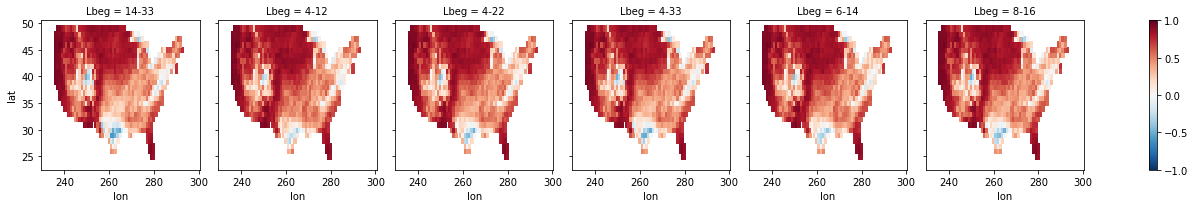

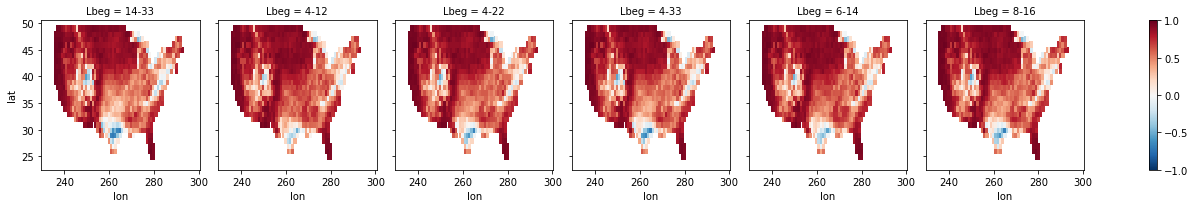

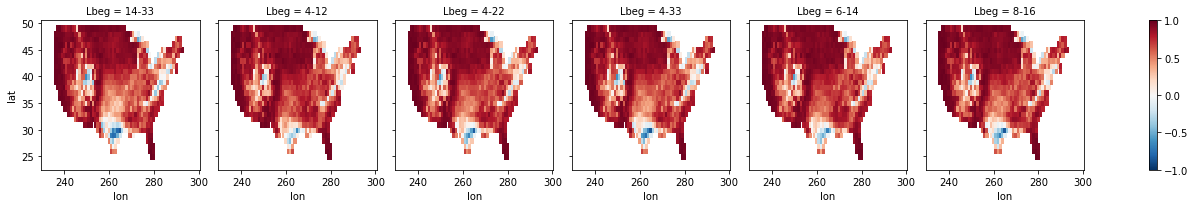

In [218]:
for iw in np.arange(0,3):
    corr_narr.isel(quant=0).isel(window=iw).plot(col='Lbeg', col_wrap=6, vmax=1)

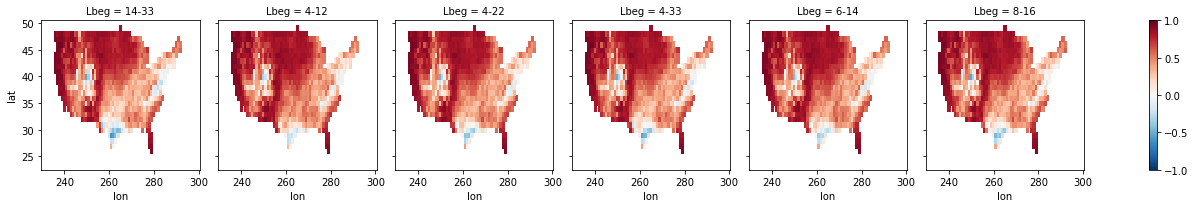

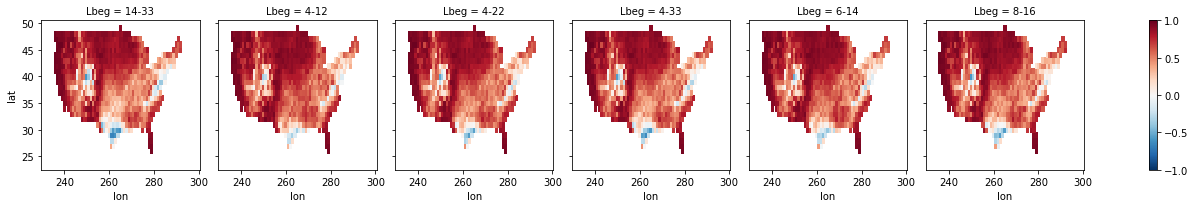

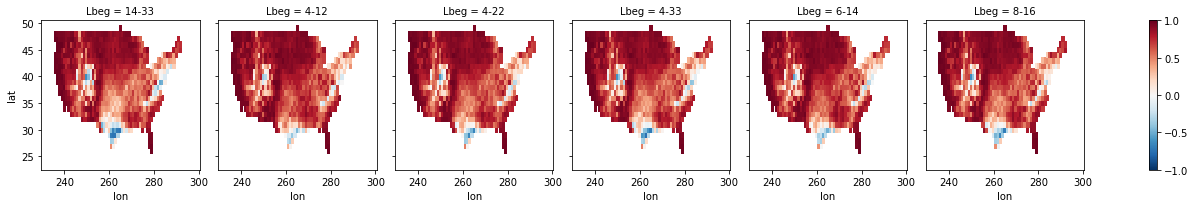

In [205]:
for iw in np.arange(0,3):
    corr_cpc.isel(quant=0).isel(window=iw).plot(col='Lbeg', col_wrap=6, vmax=1)

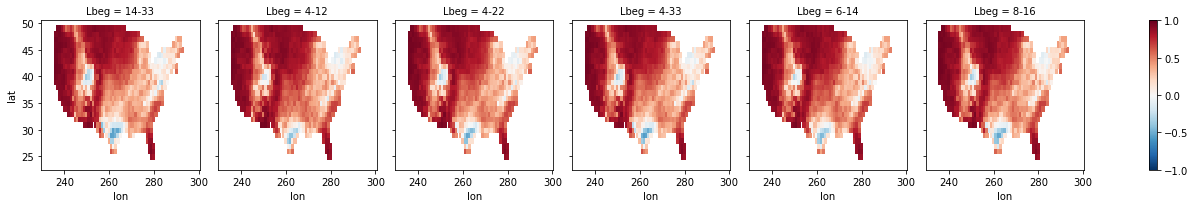

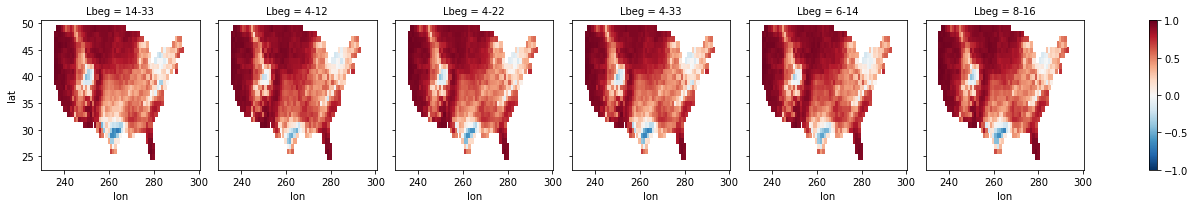

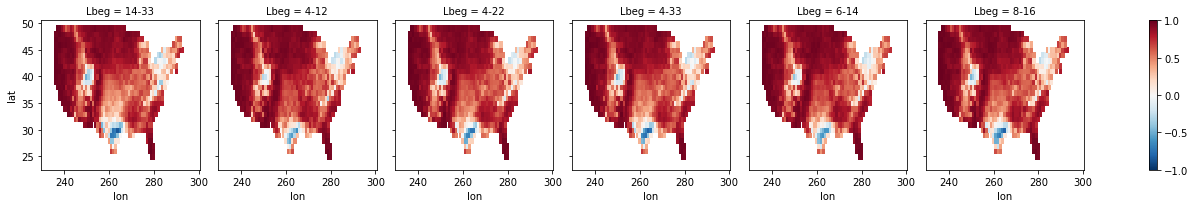

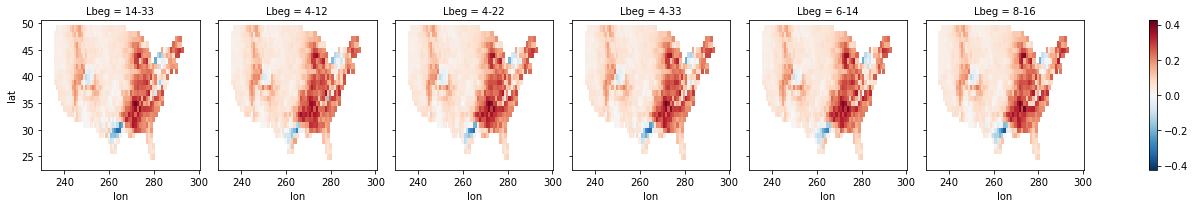

In [220]:
for iw in np.arange(0,3):
    corr_persiann.isel(quant=0).isel(window=iw).plot(col='Lbeg', col_wrap=6, vmax=1)
(corr_persiann.isel(quant=0).isel(window=2)-corr_persiann.isel(quant=0).isel(window=0)).plot(col='Lbeg', col_wrap=6)


In [227]:
ds_clim_test_3d_all = xr.open_dataset('ds_clim_test_3d_all_aug2020.nc')

In [46]:
smooth_clim_cauchy_moreQ = xr.open_dataset('smooth_clim_cauchy_oct2020_moreQ.nc')
smooth_clim_cauchy_moreQ = smooth_clim_cauchy_moreQ.rename({'Lbeg':'L_range'})
smooth_clim_cauchy_moreQ

<xarray.Dataset>
Dimensions:      (L_range: 1, lat: 28, lon: 71, quantile: 3, target_clim: 365)
Coordinates:
  * L_range      (L_range) object '14-33'
  * quantile     (quantile) float64 0.5 0.667 0.75
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, L_range, quantile, lat, lon) float64 ...

In [51]:
ds_clim_test_3d_all = xr.open_dataset('ds_clim_test_3d_all_aug2020.nc')
ds_clim_test_3d_all = ds_clim_test_3d_all.rename({'Lbeg':'L_range'})

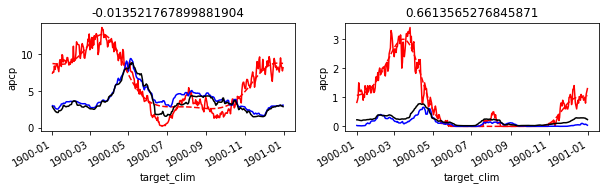

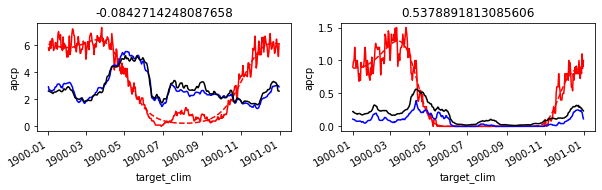

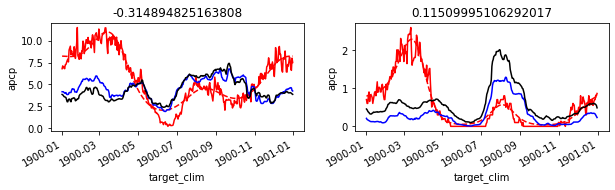

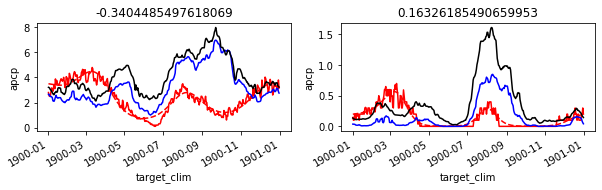

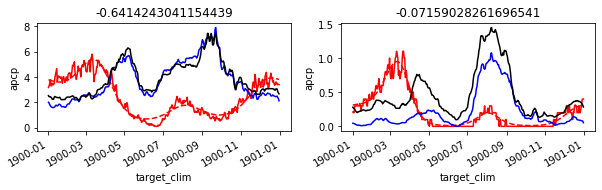

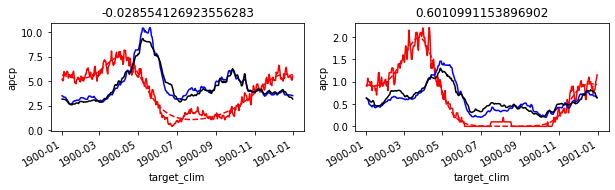

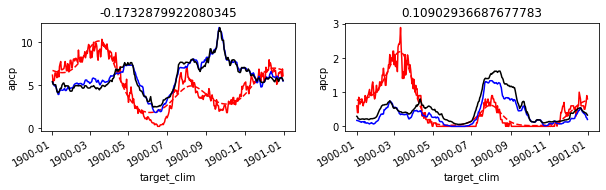

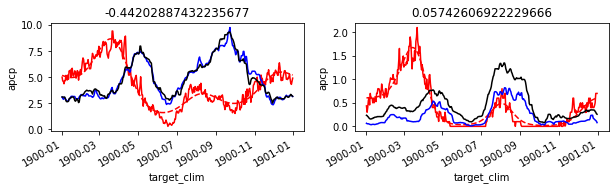

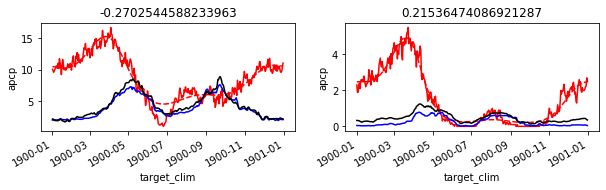

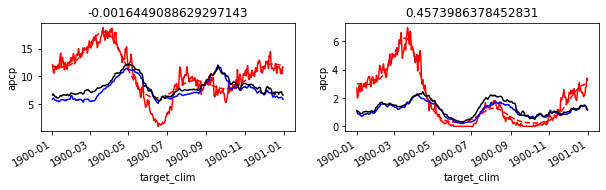

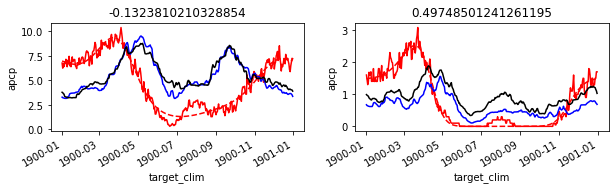

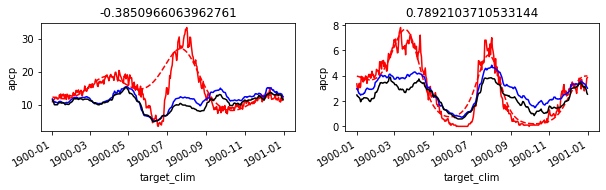

In [99]:
maskcorr = corr_narr.isel(quant=0).isel(window=2).isel(L_range=0)
for ilon in maskcorr.lon.values:
    for ilat in maskcorr.lat.values:
        if (ilat>35)&(ilon<260):
            if maskcorr.sel(lat=ilat, lon=ilon)<0:
                plt.figure(figsize=(10,2))
                ax = plt.subplot(121)
                ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=4).sel(lat=ilat, lon=ilon).plot.line('r',x='target_clim',ax=ax)
                smooth_clim_cauchy.pr_sfc.isel(L_range=0).sel(lat=ilat, lon=ilon).plot.line('r--',x='target_clim',ax=ax)
                cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim')
        #             persiann_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('m',ax=ax, x='target_clim')
                narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('k',ax=ax, x='target_clim')
                ax.set_title(np.corrcoef(ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=4).sel(lat=ilat, lon=ilon),
                                         narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax.set_title(np.corrcoef(smooth_clim_cauchy.pr_sfc.isel(L_range=0).sel(lat=ilat, lon=ilon),
                                         narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax = plt.subplot(122)
                ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=2).sel(lat=ilat, lon=ilon).plot.line('r',x='target_clim',ax=ax)
                smooth_clim_cauchy_moreQ.pr_sfc.isel(L_range=0).isel(quantile=0).sel(lat=ilat, lon=ilon).plot.line('r--',x='target_clim',ax=ax)
                cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim')
        #             persiann_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('m',ax=ax, x='target_clim')
                narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('k',ax=ax, x='target_clim')
                ax.set_title(np.corrcoef(ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=2).sel(lat=ilat, lon=ilon),
                                        narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax.set_title(np.corrcoef(smooth_clim_cauchy_moreQ.pr_sfc.isel(L_range=0).isel(quantile=0).sel(lat=ilat, lon=ilon),
                                        narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])


/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


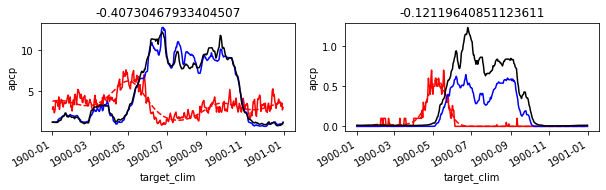

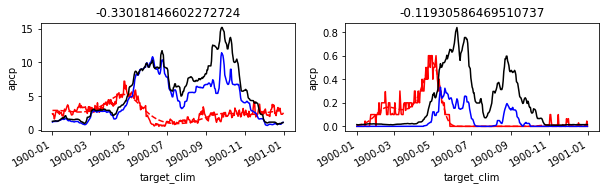

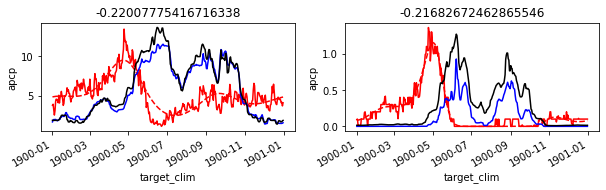

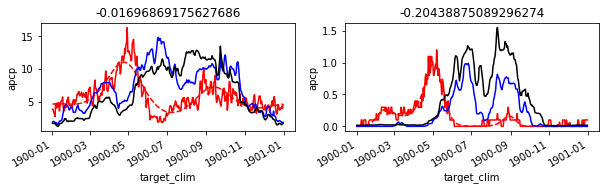

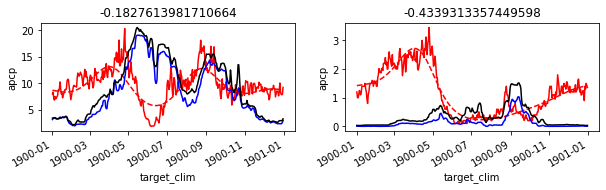

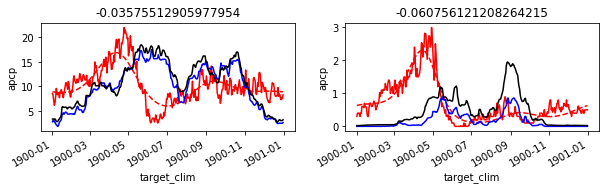

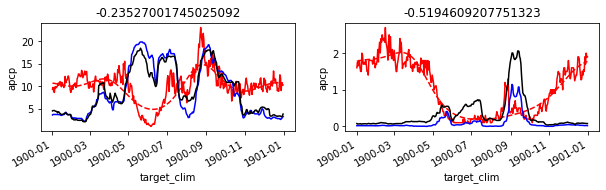

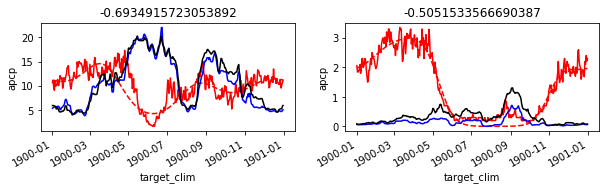

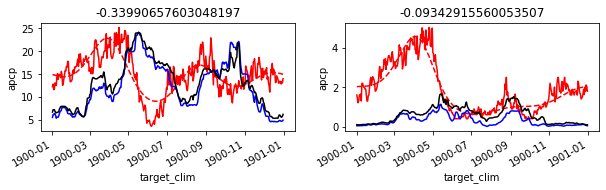

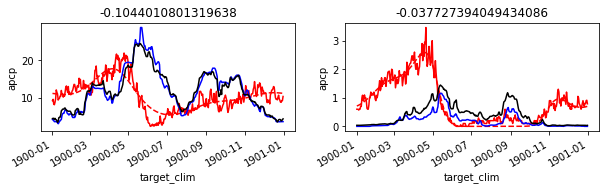

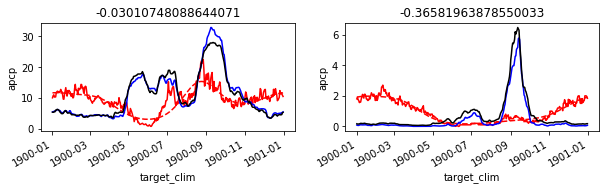

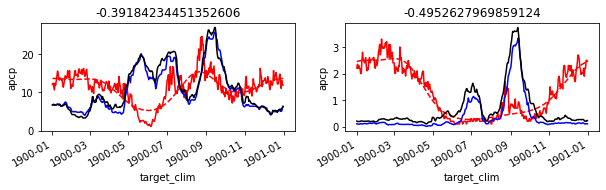

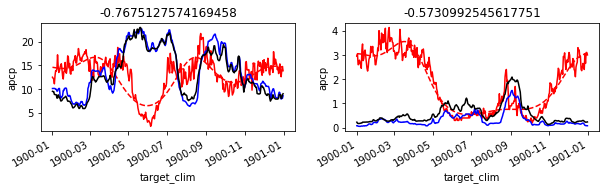

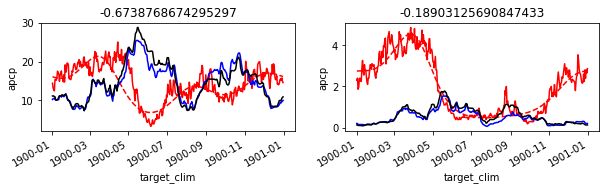

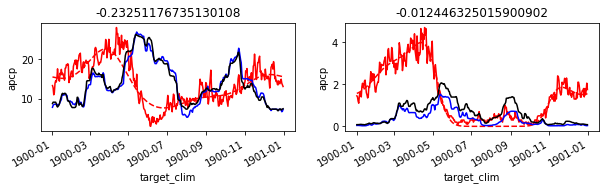

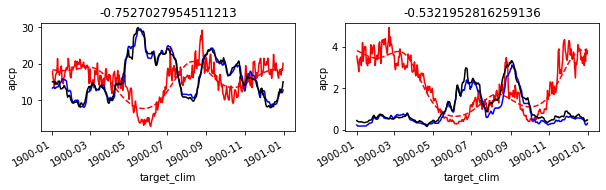

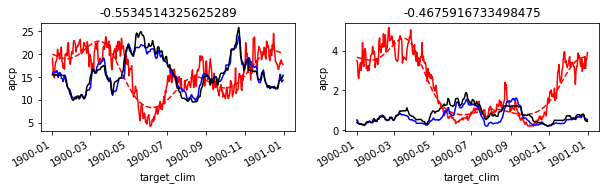

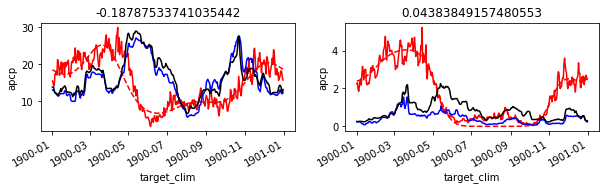

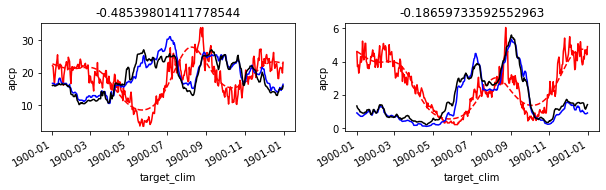

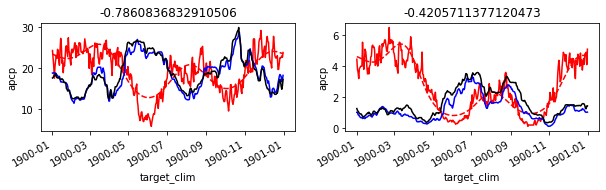

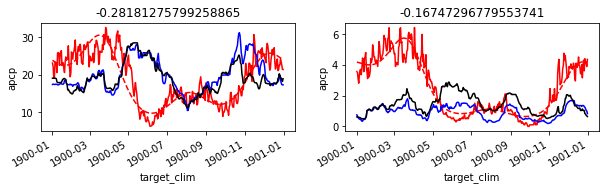

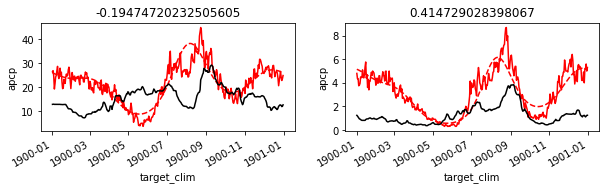

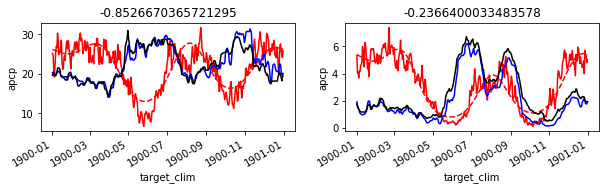

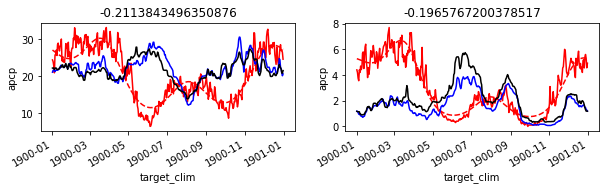

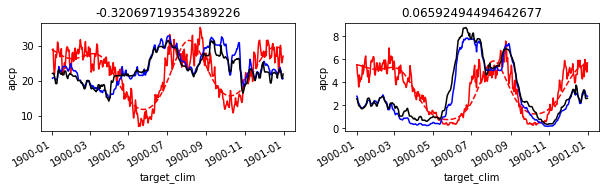

In [100]:
maskcorr = corr_narr.isel(quant=0).isel(window=2).isel(L_range=0)
for ilon in maskcorr.lon.values:
    for ilat in maskcorr.lat.values:
        if (ilat<35)&(ilon<270):
            if maskcorr.sel(lat=ilat, lon=ilon)<0:
                plt.figure(figsize=(10,2))
                ax = plt.subplot(121)
                ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=4).sel(lat=ilat, lon=ilon).plot.line('r',x='target_clim',ax=ax)
                smooth_clim_cauchy.pr_sfc.isel(L_range=0).sel(lat=ilat, lon=ilon).plot.line('r--',x='target_clim',ax=ax)
                cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim')
        #             persiann_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('m',ax=ax, x='target_clim')
                narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('k',ax=ax, x='target_clim')
                ax.set_title(np.corrcoef(ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=4).sel(lat=ilat, lon=ilon),
                                         narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax.set_title(np.corrcoef(smooth_clim_cauchy.pr_sfc.isel(L_range=0).sel(lat=ilat, lon=ilon),
                                         narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax = plt.subplot(122)
                ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=2).sel(lat=ilat, lon=ilon).plot.line('r',x='target_clim',ax=ax)
                smooth_clim_cauchy_moreQ.pr_sfc.isel(L_range=0).isel(quantile=0).sel(lat=ilat, lon=ilon).plot.line('r--',x='target_clim',ax=ax)
                cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim')
        #             persiann_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('m',ax=ax, x='target_clim')
                narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('k',ax=ax, x='target_clim')
                ax.set_title(np.corrcoef(ds_clim_test_3d_all.pr_sfc.isel(L_range=0).isel(quantile=2).sel(lat=ilat, lon=ilon),
                                        narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
                ax.set_title(np.corrcoef(smooth_clim_cauchy_moreQ.pr_sfc.isel(L_range=0).isel(quantile=0).sel(lat=ilat, lon=ilon),
                                        narr_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=2).isel(window=2).sel(lat=ilat, lon=ilon))[0][1])
            


In [225]:
cpc_clim_test_3d.apcp.where(ds_mask.the_geom>0).isel(quant=4).isel(window=2).sel(lat=ilat, lon=ilon).plot.line('b',ax=ax, x='target_clim')


In [ ]:
(corr_persiann.isel(quant=0).isel(window=2)-corr_persiann.isel(quant=0).isel(window=0)).plot(col='Lbeg', col_wrap=6)
